In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/modellingdataset/ModellingDataset-processed.csv
/kaggle/input/df-corrtraffic/df_corrtraffic.csv
/kaggle/input/df-corrtraffic-fullnames/df_corrtraffic_with full names.csv
/kaggle/input/dataset-no2/NO2_allvariables_sept.csv


In [2]:
dataset = pd.read_csv(r"../input/modellingdataset/ModellingDataset-processed.csv", sep=';')

In [3]:
dataset.head()

,Longitude,Latitude,wkd_day_value,wnd_day_value,wkd_night_value,wnd_night_value,mean_value_NO2,radiation,nightlight_450,nightlight_4950,...,dec,BldDen100,BldDen500,BldDen1000,NDVI,trafBuf25,trafBuf50,trafBuf100,trafBuf400,trafBuf800
0,10.008293,48.397079,30.711957,24.263388,30.438486,28.947476,29.250500,3.192437,22.585377,8.363607,...,62.866955,1.000663,0.910937,0.882346,2310.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,10.021227,53.523262,36.081548,24.658060,32.506374,26.049035,32.098936,2.766697,23.546194,24.685654,...,82.943985,0.978245,0.744309,0.658124,2518.0,0.000000,0.000000,0.000000,3519.916667,3393.511359
2,10.053859,53.592301,74.562843,51.863782,42.898774,32.600595,58.703744,2.750459,18.290140,15.945211,...,83.520721,0.914638,0.847111,0.803237,3216.0,674.791667,674.791667,674.791667,674.791667,674.791667
3,10.081685,53.529020,26.523551,16.095810,27.551486,20.929309,24.249276,2.763114,23.645823,15.955007,...,81.807358,0.712983,0.888149,0.882168,1052.0,0.000000,0.000000,0.000000,674.791667,674.791667
4,10.096292,48.847917,20.847284,14.966896,22.121349,19.603630,19.912116,3.156638,14.026642,2.950591,...,72.965553,1.000641,0.835228,0.709444,3240.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
pd.set_option('display.max_columns', None)
dataset.describe()

,Longitude,Latitude,wkd_day_value,wnd_day_value,wkd_night_value,wnd_night_value,mean_value_NO2,radiation,nightlight_450,nightlight_4950,nightlight_3150,nightlight_900,elevation,industry_1000,industry_100,industry_25,industry_3000,industry_300,industry_5000,industry_500,industry_50,population_1000,population_3000,population_5000,road_class_1_1000,road_class_1_100,road_class_1_25,road_class_1_3000,road_class_1_300,road_class_1_5000,road_class_1_500,road_class_1_50,road_class_2_1000,road_class_2_100,road_class_2_25,road_class_2_3000,road_class_2_300,road_class_2_5000,road_class_2_500,road_class_2_50,road_class_3_1000,road_class_3_100,road_class_3_25,road_class_3_3000,road_class_3_300,road_class_3_5000,road_class_3_500,road_class_3_50,temperature_2m_10,temperature_2m_11,temperature_2m_12,temperature_2m_1,temperature_2m_2,temperature_2m_3,temperature_2m_4,temperature_2m_5,temperature_2m_6,temperature_2m_7,temperature_2m_8,temperature_2m_9,TROP_2018,wind_speed_10m_10,wind_speed_10m_11,wind_speed_10m_12,wind_speed_10m_1,wind_speed_10m_2,wind_speed_10m_3,wind_speed_10m_4,wind_speed_10m_5,wind_speed_10m_6,wind_speed_10m_7,wind_speed_10m_8,wind_speed_10m_9,trop_mean_filt_2019,jan,feb,mar,apr,may,jun,jul,aug,oct,sep,nov,dec,BldDen100,BldDen500,BldDen1000,NDVI,trafBuf25,trafBuf50,trafBuf100,trafBuf400,trafBuf800
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02,482.000000,482.000000,4.820000e+02,482.000000,4.820000e+02,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,481.000000,481.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,476.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,9.261343,51.197532,26.954116,19.891472,21.943770,19.482789,23.704356,2.958882,15.339811,9.044924,11.042987,14.757297,171.712392,1.759829e+05,1379.668050,141.338174,1.627321e+06,12540.197095,3.855807e+06,37978.475104,357.883817,6154.486286,41489.437120,94125.623430,1212.001476,12.295357,1.529753,12302.269079,101.676785,34352.880077,280.871975,3.874495,2231.118530,68.942846,14.572097,12916.796713,330.254867,26376.055502,732.897073,28.610143,22133.352695,272.058826,32.639911,136692.065999,2314.033584,304244.123667,6247.359697,79.579393,11.888703,5.707740,3.065015,-1.388283,3.377644,7.307135,7.759075,14.236675,18.137460,18.359029,18.242144,13.458786,447.853711,3.617826,3.077223,3.656993,2.804031,3.360133,3.193947,2.921907,2.538312,2.970147,2.658043,2.482413,2.674618,0.000067,44.110073,48.822715,54.784274,32.894402,52.052772,79.125816,123.538727,79.417375,69.232866,77.112976,81.436638,83.921225,0.677052,0.622411,0.571960,3331.373950,100.078844,119.672010,171.645160,419.467777,591.477352
std,2.738530,1.621991,16.037734,12.152807,9.692638,8.988529,12.886250,0.135886,13.528546,10.100697,10.940724,12.881364,210.376782,3.420002e+05,5266.517329,595.285466,1.873091e+06,36913.058761,3.917068e+06,95029.695119,1491.693070,4509.973126,34979.658532,88294.089372,2705.754172,73.109976,12.240787,13434.904611,403.926782,30123.308469,911.739711,28.728664,2656.942121,145.932769,34.954581,11587.403831,545.379983,20947.147222,1087.161665,64.267149,13329.888215,236.379343,41.931537,83339.859648,1547.899665,186246.744040,3891.777537,86.872853,1.606676,1.440989,1.549856,2.140847,1.442662,1.219349,1.158110,1.583106,1.

In [5]:
#get rid off unnecessary variables

#unique identifier and geodata
dataset = dataset.drop(['Longitude', 'Latitude'], axis=1)
#also drop temporal NO2 variables
dataset = dataset.drop(['wkd_day_value', 'wnd_day_value', 'wkd_night_value', 'wnd_night_value'], axis=1)

In [6]:
dataset.head()
print(len(dataset.columns))
dataset.describe()

89


,mean_value_NO2,radiation,nightlight_450,nightlight_4950,nightlight_3150,nightlight_900,elevation,industry_1000,industry_100,industry_25,industry_3000,industry_300,industry_5000,industry_500,industry_50,population_1000,population_3000,population_5000,road_class_1_1000,road_class_1_100,road_class_1_25,road_class_1_3000,road_class_1_300,road_class_1_5000,road_class_1_500,road_class_1_50,road_class_2_1000,road_class_2_100,road_class_2_25,road_class_2_3000,road_class_2_300,road_class_2_5000,road_class_2_500,road_class_2_50,road_class_3_1000,road_class_3_100,road_class_3_25,road_class_3_3000,road_class_3_300,road_class_3_5000,road_class_3_500,road_class_3_50,temperature_2m_10,temperature_2m_11,temperature_2m_12,temperature_2m_1,temperature_2m_2,temperature_2m_3,temperature_2m_4,temperature_2m_5,temperature_2m_6,temperature_2m_7,temperature_2m_8,temperature_2m_9,TROP_2018,wind_speed_10m_10,wind_speed_10m_11,wind_speed_10m_12,wind_speed_10m_1,wind_speed_10m_2,wind_speed_10m_3,wind_speed_10m_4,wind_speed_10m_5,wind_speed_10m_6,wind_speed_10m_7,wind_speed_10m_8,wind_speed_10m_9,trop_mean_filt_2019,jan,feb,mar,apr,may,jun,jul,aug,oct,sep,nov,dec,BldDen100,BldDen500,BldDen1000,NDVI,trafBuf25,trafBuf50,trafBuf100,trafBuf400,trafBuf800
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02,482.000000,482.000000,4.820000e+02,482.000000,4.820000e+02,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,481.000000,481.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,476.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,23.704356,2.958882,15.339811,9.044924,11.042987,14.757297,171.712392,1.759829e+05,1379.668050,141.338174,1.627321e+06,12540.197095,3.855807e+06,37978.475104,357.883817,6154.486286,41489.437120,94125.623430,1212.001476,12.295357,1.529753,12302.269079,101.676785,34352.880077,280.871975,3.874495,2231.118530,68.942846,14.572097,12916.796713,330.254867,26376.055502,732.897073,28.610143,22133.352695,272.058826,32.639911,136692.065999,2314.033584,304244.123667,6247.359697,79.579393,11.888703,5.707740,3.065015,-1.388283,3.377644,7.307135,7.759075,14.236675,18.137460,18.359029,18.242144,13.458786,447.853711,3.617826,3.077223,3.656993,2.804031,3.360133,3.193947,2.921907,2.538312,2.970147,2.658043,2.482413,2.674618,0.000067,44.110073,48.822715,54.784274,32.894402,52.052772,79.125816,123.538727,79.417375,69.232866,77.112976,81.436638,83.921225,0.677052,0.622411,0.571960,3331.373950,100.078844,119.672010,171.645160,419.467777,591.477352
std,12.886250,0.135886,13.528546,10.100697,10.940724,12.881364,210.376782,3.420002e+05,5266.517329,595.285466,1.873091e+06,36913.058761,3.917068e+06,95029.695119,1491.693070,4509.973126,34979.658532,88294.089372,2705.754172,73.109976,12.240787,13434.904611,403.926782,30123.308469,911.739711,28.728664,2656.942121,145.932769,34.954581,11587.403831,545.379983,20947.147222,1087.161665,64.267149,13329.888215,236.379343,41.931537,83339.859648,1547.899665,186246.744040,3891.777537,86.872853,1.606676,1.440989,1.549856,2.140847,1.442662,1.219349,1.158110,1.583106,1.994989,1.995413,1.921579,1.575486,165.329639,1.059308,0.754326,0.876437,0.629846,0.897722,0.670553,0.741712,0.675970,0.765123,0.569333,0.633474,0.695912,0.000025,16.464570,19.096025,13.305186,22.083415,20.369576,32.689972,27.947190,24.154549,23.895473,41.12224

In [7]:
dataset.isna().sum().sum()

8

In [8]:
#remove NA values
dataset = dataset.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)

In [9]:
dataset.head()

,mean_value_NO2,radiation,nightlight_450,nightlight_4950,nightlight_3150,nightlight_900,elevation,industry_1000,industry_100,industry_25,industry_3000,industry_300,industry_5000,industry_500,industry_50,population_1000,population_3000,population_5000,road_class_1_1000,road_class_1_100,road_class_1_25,road_class_1_3000,road_class_1_300,road_class_1_5000,road_class_1_500,road_class_1_50,road_class_2_1000,road_class_2_100,road_class_2_25,road_class_2_3000,road_class_2_300,road_class_2_5000,road_class_2_500,road_class_2_50,road_class_3_1000,road_class_3_100,road_class_3_25,road_class_3_3000,road_class_3_300,road_class_3_5000,road_class_3_500,road_class_3_50,temperature_2m_10,temperature_2m_11,temperature_2m_12,temperature_2m_1,temperature_2m_2,temperature_2m_3,temperature_2m_4,temperature_2m_5,temperature_2m_6,temperature_2m_7,temperature_2m_8,temperature_2m_9,TROP_2018,wind_speed_10m_10,wind_speed_10m_11,wind_speed_10m_12,wind_speed_10m_1,wind_speed_10m_2,wind_speed_10m_3,wind_speed_10m_4,wind_speed_10m_5,wind_speed_10m_6,wind_speed_10m_7,wind_speed_10m_8,wind_speed_10m_9,trop_mean_filt_2019,jan,feb,mar,apr,may,jun,jul,aug,oct,sep,nov,dec,BldDen100,BldDen500,BldDen1000,NDVI,trafBuf25,trafBuf50,trafBuf100,trafBuf400,trafBuf800
0,29.250500,3.192437,22.585377,8.363607,13.402575,21.461321,473.936554,330625,0,0,4466250,39375,6101250,92500,0,8123.319336,54316.64453,95795.42188,0.00000,0.0,0.0,25200.30273,0.000000,49436.99219,0.000000,0.0,0.000000,0.000000,0.000000,7335.407715,0.000000,28671.41016,0.000000,0.000000,31902.113280,313.874695,67.135361,203502.42190,4167.064941,373058.6875,8838.760742,180.451675,10.528473,3.994838,0.855892,-4.079916,2.809515,6.935457,7.397969,13.671423,18.533785,18.813995,18.982145,12.485922,365.725586,2.585911,2.669442,2.989511,2.531975,2.521507,2.995023,2.301084,1.968707,2.190526,2.260399,1.821999,1.986542,0.000058,32.444660,30.905764,45.278419,86.813194,76.644829,84.025391,139.684372,131.750168,54.812149,62.195648,82.809517,62.866955,1.000663,0.910937,0.882346,2310.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,32.098936,2.766697,23.546194,24.685654,22.862799,23.769573,6.617548,936250,0,0,6596250,19375,16483125,131875,0,9558.207031,76786.28125,215604.75000,11369.98047,0.0,0.0,34764.07031,1696.450439,62711.52344,2980.910156,0.0,0.000000,0.000000,0.000000,8974.225586,0.000000,47182.19922,0.000000,0.000000,14582.227540,440.061707,0.000000,99596.04688,1850.278076,313205.7188,5933.034668,58.030884,12.299079,6.153886,3.775151,0.131844,2.825560,6.828553,7.554647,13.972361,17.087158,17.238230,17.520105,13.991841,470.292419,3.869850,3.246683,3.802317,2.791856,3.617435,3.091028,3.455901,2.932038,3.273580,2.649281,2.828152,2.777970,0.000081,64.174301,52.970375,69.828476,50.332016,78.252930,146.870132,105.720657,64.659004,117.034981,70.474373,84.549225,82.943985,0.978245,0.744309,0.658124,2518.0,0.000000,0.000000,0.000000,3519.916667,3393.511359
2,58.703744,2.750459,18.290140,15.945211,16.493486,18.070522,18.593605,2500,0,0,343125,0,1212500,0,0,10471.541020,88439.60938,222648.40630,0.00000,0.0,0.0,0.00000,0.000000,11057.72949,0.000000,0.0,5136.330566,270.224976,46.359188,30608.843750,1437.363037,84130.39844,2333.146484,108.745453,34317.210940,157.915741,10.258605,265563.71880,2016.838379,646760.6250,6662.844727,52.477299,12.236689,6.117405,3.744394,0.196013,2.759445,6.723662,7.453573,13.866946,16.986099,17.125896,17.437189,13.936767,457.479950,3.886321,3.264446,3.828975,2.811795,3.632486,3.095585,3.479126,2.962678,3.304003,2.660490,2.845692,2.803313,0.000076,63.257851,53.338516,68.428001,50.577240,76.791069,146.810501,105.269150,63.642395,120.899490,72.389526,85.652794,83.520721,0.914638,0.847111,0.803237,3216.0,674.791667,674.791667,674.791667,674.791667,674.791667
3,24.249276,2.763114,23.645823,15.955007,18.248226,23.700480,6.414716,2310625,26250,3125,7480000,202500,12168125,645000,8125,11165.945310,76961.00000,185735.31250,0.00000,0.0,0.0,30830.10938,0.000000,84649.88281,0.000000,0.0,3274.291504,0.000000,0.00000

In [10]:
##CREATE DEPENDENT- AND INDEPENDENT VARIABLES
#store all column names
all_column_names = dataset.columns

#create dataset with only predictor variables
x = dataset.drop(["mean_value_NO2"], axis=1)
#store column names of predictor variables
feature_names = x.columns
#dependent variable
y = dataset["mean_value_NO2"]
#verify if dependent variable is out of dataset
print(len(feature_names))

88


In [11]:
#transform dependent- and independent variables to numpy arrays for calculations
x = np.array(x)
y = np.array(y)

In [12]:
#import necessary modules that are included into the function
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut,ShuffleSplit
import itertools 
import matplotlib.pyplot as plt

In [13]:
#CONSTRUCT FUNCTION - CV FEATURE IMPORTANCE (MEDIAN)

#set initial model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

#generate function that creates K-fold CV, thereby creating shap summary plot for each loop/fold.

def cvfi(data_x, data_y, model, nofolds, names):
    ss = ShuffleSplit(n_splits=nofolds, test_size=0.25, random_state=0)
    
    total = list(itertools.repeat(0, 88)) #85 copies of 0 - needed for generating mean of CV
    ranking = []
    
    for train, test in ss.split(data_x, data_y):
        data_x_train = np.array(data_x[train])
        data_y_train = np.array(data_y[train])
        data_x_test = np.array(data_x[test])

        # Train the model on training data
        model.fit(data_x_train, data_y_train)
#         print(model)
        
        shap_values = shap.TreeExplainer(model).shap_values(data_x_train)
#         shap.summary_plot(shap_values, data_x_train, feature_names=names, plot_type='bar')
        shap.summary_plot(shap_values, data_x_train, feature_names=names, plot_type='bar')
        
        #https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
        # according to this source, training dataset is used to calculate shap values
        
        df = pd.DataFrame(feature_names, np.abs(shap_values).mean(0))
        df['index'] = df.index
        df.reset_index(drop=True, inplace=True)
        df.columns = [''] * len(df.columns)
        
        df.columns = ['name','shap']
        print(df)
        df_sort = df.sort_values(by = ['shap'], ascending=False)
        df_sort['rank'] = np.arange(1, len(df) * 1 + 1, 1)
        df_new = df_sort.drop(['shap'], axis=1)
        print(df_new)
#         rnk_pd.append(df_new, ignore_index = True)
        rank_array = df_new.values
        
        print(rank_array)
        ranking.append(rank_array)
        
        
        
       
        #convert importance values to numpy array
        vals= np.abs(shap_values).mean(0)
        print(vals)
        
       
        
        print(len(vals))
        total += vals
    
    print(total)
    print(ranking)
    cvfi.ranking = ranking
    
    cvfi.meanfi = total/nofolds #allows use of local variable outside function
    

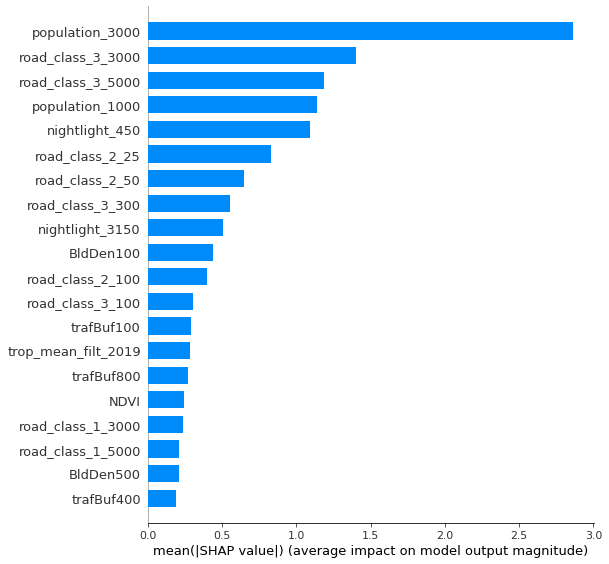

               name      shap
0         radiation  0.094422
1    nightlight_450  1.090924
2   nightlight_4950  0.143070
3   nightlight_3150  0.502812
4    nightlight_900  0.083832
..              ...       ...
83        trafBuf25  0.060232
84        trafBuf50  0.108279
85       trafBuf100  0.287790
86       trafBuf400  0.191496
87       trafBuf800  0.267175

[88 rows x 2 columns]
                 name  rank
15    population_3000     1
36  road_class_3_3000     2
38  road_class_3_5000     3
14    population_1000     4
1      nightlight_450     5
..                ...   ...
19    road_class_1_25    84
21   road_class_1_300    85
7        industry_100    86
13        industry_50    87
8         industry_25    88

[88 rows x 2 columns]
[['population_3000' 1]
 ['road_class_3_3000' 2]
 ['road_class_3_5000' 3]
 ['population_1000' 4]
 ['nightlight_450' 5]
 ['road_class_2_25' 6]
 ['road_class_2_50' 7]
 ['road_class_3_300' 8]
 ['nightlight_3150' 9]
 ['BldDen100' 10]
 ['road_class_2_100' 11]
 ['r

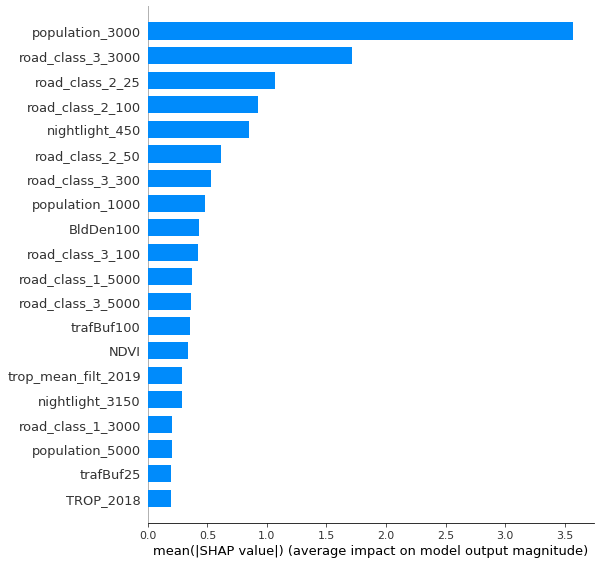

               name      shap
0         radiation  0.063367
1    nightlight_450  0.851246
2   nightlight_4950  0.160526
3   nightlight_3150  0.284221
4    nightlight_900  0.149762
..              ...       ...
83        trafBuf25  0.197072
84        trafBuf50  0.132894
85       trafBuf100  0.351995
86       trafBuf400  0.150560
87       trafBuf800  0.124853

[88 rows x 2 columns]
                 name  rank
15    population_3000     1
36  road_class_3_3000     2
27    road_class_2_25     3
26   road_class_2_100     4
1      nightlight_450     5
..                ...   ...
18   road_class_1_100    84
13        industry_50    85
24    road_class_1_50    86
19    road_class_1_25    87
8         industry_25    88

[88 rows x 2 columns]
[['population_3000' 1]
 ['road_class_3_3000' 2]
 ['road_class_2_25' 3]
 ['road_class_2_100' 4]
 ['nightlight_450' 5]
 ['road_class_2_50' 6]
 ['road_class_3_300' 7]
 ['population_1000' 8]
 ['BldDen100' 9]
 ['road_class_3_100' 10]
 ['road_class_1_5000' 11]
 ['

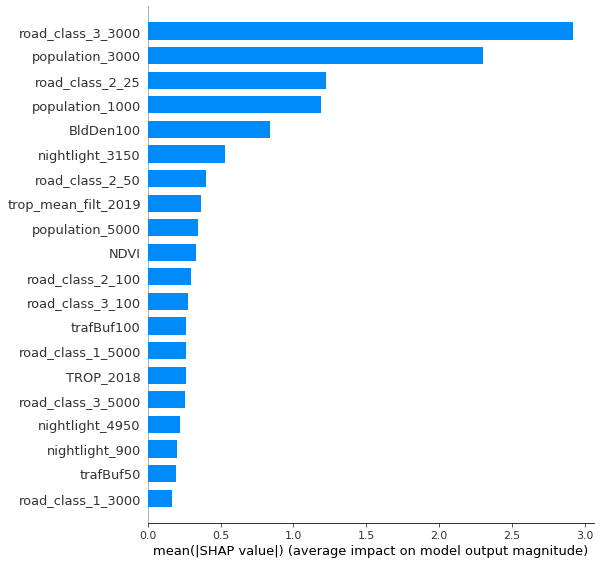

               name      shap
0         radiation  0.065887
1    nightlight_450  0.144558
2   nightlight_4950  0.223750
3   nightlight_3150  0.528622
4    nightlight_900  0.200850
..              ...       ...
83        trafBuf25  0.149749
84        trafBuf50  0.190140
85       trafBuf100  0.265625
86       trafBuf400  0.102745
87       trafBuf800  0.102739

[88 rows x 2 columns]
                 name  rank
36  road_class_3_3000     1
15    population_3000     2
27    road_class_2_25     3
14    population_1000     4
79          BldDen100     5
..                ...   ...
19    road_class_1_25    84
24    road_class_1_50    85
7        industry_100    86
13        industry_50    87
8         industry_25    88

[88 rows x 2 columns]
[['road_class_3_3000' 1]
 ['population_3000' 2]
 ['road_class_2_25' 3]
 ['population_1000' 4]
 ['BldDen100' 5]
 ['nightlight_3150' 6]
 ['road_class_2_50' 7]
 ['trop_mean_filt_2019' 8]
 ['population_5000' 9]
 ['NDVI' 10]
 ['road_class_2_100' 11]
 ['road_class

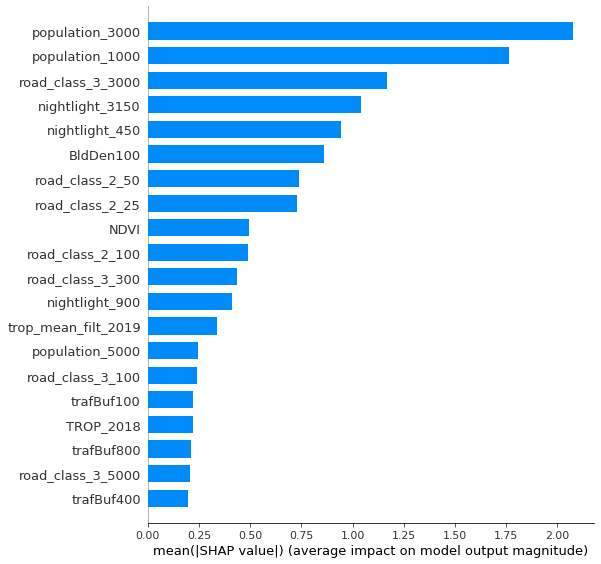

               name      shap
0         radiation  0.077554
1    nightlight_450  0.941578
2   nightlight_4950  0.145644
3   nightlight_3150  1.042580
4    nightlight_900  0.411966
..              ...       ...
83        trafBuf25  0.083404
84        trafBuf50  0.167494
85       trafBuf100  0.220451
86       trafBuf400  0.198079
87       trafBuf800  0.210252

[88 rows x 2 columns]
                 name  rank
15    population_3000     1
14    population_1000     2
36  road_class_3_3000     3
3     nightlight_3150     4
1      nightlight_450     5
..                ...   ...
7        industry_100    84
19    road_class_1_25    85
24    road_class_1_50    86
13        industry_50    87
8         industry_25    88

[88 rows x 2 columns]
[['population_3000' 1]
 ['population_1000' 2]
 ['road_class_3_3000' 3]
 ['nightlight_3150' 4]
 ['nightlight_450' 5]
 ['BldDen100' 6]
 ['road_class_2_50' 7]
 ['road_class_2_25' 8]
 ['NDVI' 9]
 ['road_class_2_100' 10]
 ['road_class_3_300' 11]
 ['nightlight_900

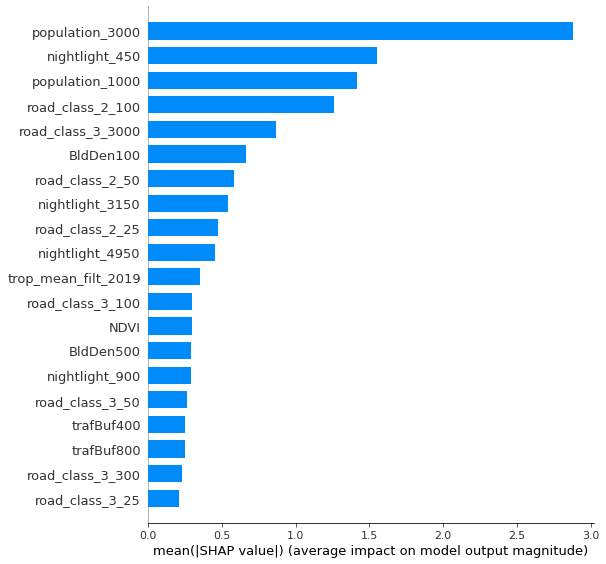

               name      shap
0         radiation  0.090148
1    nightlight_450  1.554771
2   nightlight_4950  0.451915
3   nightlight_3150  0.543155
4    nightlight_900  0.292712
..              ...       ...
83        trafBuf25  0.091900
84        trafBuf50  0.042657
85       trafBuf100  0.168978
86       trafBuf400  0.253601
87       trafBuf800  0.250866

[88 rows x 2 columns]
                 name  rank
15    population_3000     1
1      nightlight_450     2
14    population_1000     3
26   road_class_2_100     4
36  road_class_3_3000     5
..                ...   ...
19    road_class_1_25    84
7        industry_100    85
13        industry_50    86
8         industry_25    87
24    road_class_1_50    88

[88 rows x 2 columns]
[['population_3000' 1]
 ['nightlight_450' 2]
 ['population_1000' 3]
 ['road_class_2_100' 4]
 ['road_class_3_3000' 5]
 ['BldDen100' 6]
 ['road_class_2_50' 7]
 ['nightlight_3150' 8]
 ['road_class_2_25' 9]
 ['nightlight_4950' 10]
 ['trop_mean_filt_2019' 11]
 ['

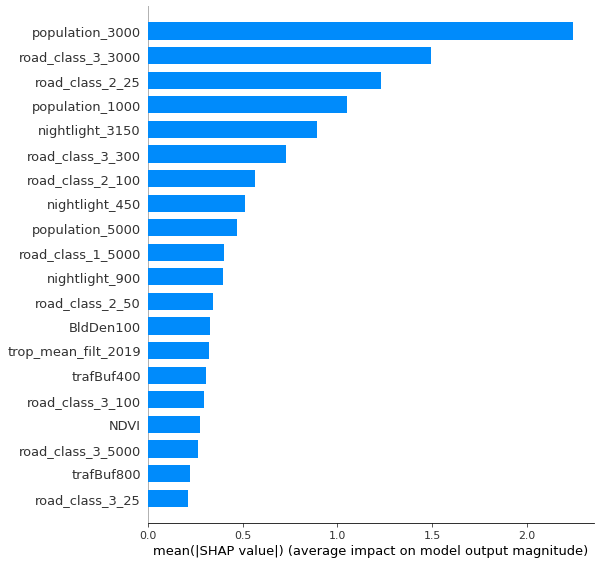

               name      shap
0         radiation  0.040176
1    nightlight_450  0.514190
2   nightlight_4950  0.074232
3   nightlight_3150  0.892408
4    nightlight_900  0.395481
..              ...       ...
83        trafBuf25  0.034187
84        trafBuf50  0.092863
85       trafBuf100  0.211765
86       trafBuf400  0.305765
87       trafBuf800  0.224210

[88 rows x 2 columns]
                 name  rank
15    population_3000     1
36  road_class_3_3000     2
27    road_class_2_25     3
14    population_1000     4
3     nightlight_3150     5
..                ...   ...
7        industry_100    84
19    road_class_1_25    85
13        industry_50    86
8         industry_25    87
24    road_class_1_50    88

[88 rows x 2 columns]
[['population_3000' 1]
 ['road_class_3_3000' 2]
 ['road_class_2_25' 3]
 ['population_1000' 4]
 ['nightlight_3150' 5]
 ['road_class_3_300' 6]
 ['road_class_2_100' 7]
 ['nightlight_450' 8]
 ['population_5000' 9]
 ['road_class_1_5000' 10]
 ['nightlight_900' 11]

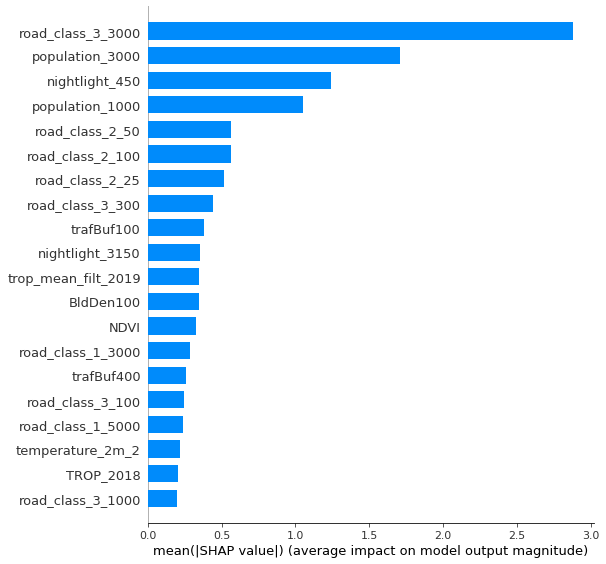

               name      shap
0         radiation  0.074336
1    nightlight_450  1.238941
2   nightlight_4950  0.065945
3   nightlight_3150  0.352667
4    nightlight_900  0.158354
..              ...       ...
83        trafBuf25  0.086428
84        trafBuf50  0.147851
85       trafBuf100  0.382920
86       trafBuf400  0.256456
87       trafBuf800  0.140138

[88 rows x 2 columns]
                 name  rank
36  road_class_3_3000     1
15    population_3000     2
1      nightlight_450     3
14    population_1000     4
32    road_class_2_50     5
..                ...   ...
10       industry_300    84
19    road_class_1_25    85
7        industry_100    86
8         industry_25    87
13        industry_50    88

[88 rows x 2 columns]
[['road_class_3_3000' 1]
 ['population_3000' 2]
 ['nightlight_450' 3]
 ['population_1000' 4]
 ['road_class_2_50' 5]
 ['road_class_2_100' 6]
 ['road_class_2_25' 7]
 ['road_class_3_300' 8]
 ['trafBuf100' 9]
 ['nightlight_3150' 10]
 ['trop_mean_filt_2019' 11]
 

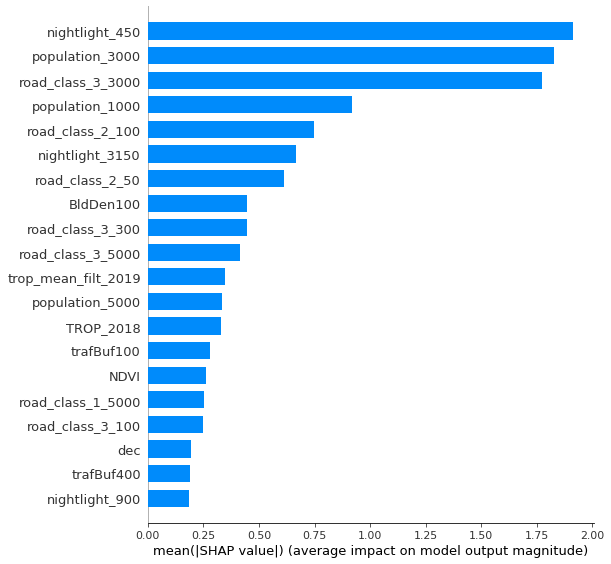

               name      shap
0         radiation  0.029285
1    nightlight_450  1.912674
2   nightlight_4950  0.117524
3   nightlight_3150  0.665067
4    nightlight_900  0.184331
..              ...       ...
83        trafBuf25  0.140493
84        trafBuf50  0.130350
85       trafBuf100  0.281423
86       trafBuf400  0.191382
87       trafBuf800  0.151371

[88 rows x 2 columns]
                 name  rank
1      nightlight_450     1
15    population_3000     2
36  road_class_3_3000     3
14    population_1000     4
26   road_class_2_100     5
..                ...   ...
10       industry_300    84
24    road_class_1_50    85
7        industry_100    86
8         industry_25    87
13        industry_50    88

[88 rows x 2 columns]
[['nightlight_450' 1]
 ['population_3000' 2]
 ['road_class_3_3000' 3]
 ['population_1000' 4]
 ['road_class_2_100' 5]
 ['nightlight_3150' 6]
 ['road_class_2_50' 7]
 ['BldDen100' 8]
 ['road_class_3_300' 9]
 ['road_class_3_5000' 10]
 ['trop_mean_filt_2019' 11]


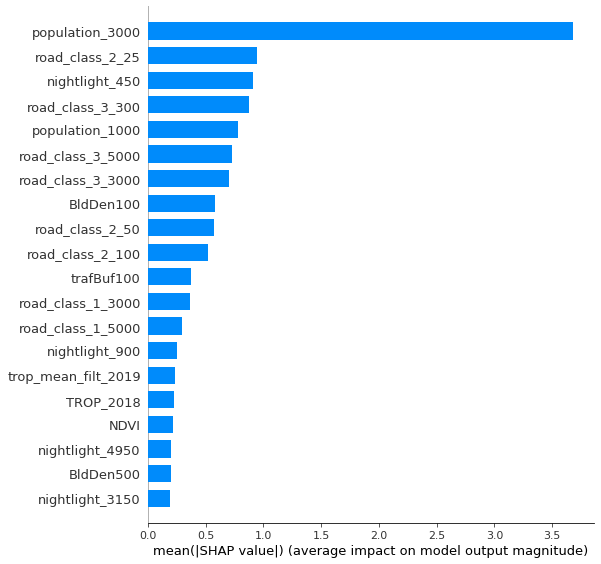

               name      shap
0         radiation  0.062219
1    nightlight_450  0.907838
2   nightlight_4950  0.202703
3   nightlight_3150  0.188689
4    nightlight_900  0.256733
..              ...       ...
83        trafBuf25  0.092262
84        trafBuf50  0.109160
85       trafBuf100  0.370416
86       trafBuf400  0.060663
87       trafBuf800  0.106617

[88 rows x 2 columns]
                name  rank
15   population_3000     1
27   road_class_2_25     2
1     nightlight_450     3
37  road_class_3_300     4
14   population_1000     5
..               ...   ...
19   road_class_1_25    84
10      industry_300    85
7       industry_100    86
8        industry_25    87
13       industry_50    88

[88 rows x 2 columns]
[['population_3000' 1]
 ['road_class_2_25' 2]
 ['nightlight_450' 3]
 ['road_class_3_300' 4]
 ['population_1000' 5]
 ['road_class_3_5000' 6]
 ['road_class_3_3000' 7]
 ['BldDen100' 8]
 ['road_class_2_50' 9]
 ['road_class_2_100' 10]
 ['trafBuf100' 11]
 ['road_class_1_3000'

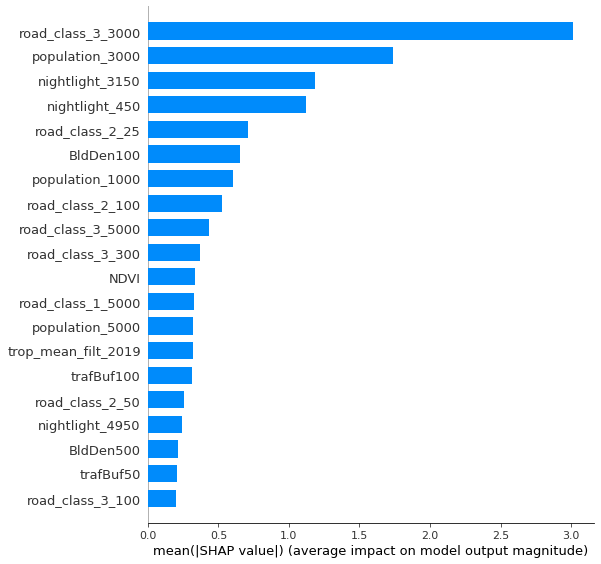

               name      shap
0         radiation  0.141484
1    nightlight_450  1.119586
2   nightlight_4950  0.243748
3   nightlight_3150  1.181966
4    nightlight_900  0.157146
..              ...       ...
83        trafBuf25  0.144930
84        trafBuf50  0.205471
85       trafBuf100  0.316283
86       trafBuf400  0.122751
87       trafBuf800  0.093694

[88 rows x 2 columns]
                 name  rank
36  road_class_3_3000     1
15    population_3000     2
3     nightlight_3150     3
1      nightlight_450     4
27    road_class_2_25     5
..                ...   ...
61   wind_speed_10m_5    84
24    road_class_1_50    85
7        industry_100    86
13        industry_50    87
8         industry_25    88

[88 rows x 2 columns]
[['road_class_3_3000' 1]
 ['population_3000' 2]
 ['nightlight_3150' 3]
 ['nightlight_450' 4]
 ['road_class_2_25' 5]
 ['BldDen100' 6]
 ['population_1000' 7]
 ['road_class_2_100' 8]
 ['road_class_3_5000' 9]
 ['road_class_3_300' 10]
 ['NDVI' 11]
 ['road_class_1

In [14]:
cvfi(x, y, rf, 10, feature_names) #argumens: dependent variable; independent variables; model; amount of k-fold; feature names

In [15]:
rank = cvfi.ranking
print(rank)

# pd_rank = pd.DataFrame(rank)
# pd_rank.head()

[array([['population_3000', 1],
       ['road_class_3_3000', 2],
       ['road_class_3_5000', 3],
       ['population_1000', 4],
       ['nightlight_450', 5],
       ['road_class_2_25', 6],
       ['road_class_2_50', 7],
       ['road_class_3_300', 8],
       ['nightlight_3150', 9],
       ['BldDen100', 10],
       ['road_class_2_100', 11],
       ['road_class_3_100', 12],
       ['trafBuf100', 13],
       ['trop_mean_filt_2019', 14],
       ['trafBuf800', 15],
       ['NDVI', 16],
       ['road_class_1_3000', 17],
       ['road_class_1_5000', 18],
       ['BldDen500', 19],
       ['trafBuf400', 20],
       ['temperature_2m_2', 21],
       ['road_class_3_50', 22],
       ['TROP_2018', 23],
       ['nightlight_4950', 24],
       ['may', 25],
       ['population_5000', 26],
       ['trafBuf50', 27],
       ['road_class_3_1000', 28],
       ['road_class_3_25', 29],
       ['jul', 30],
       ['dec', 31],
       ['radiation', 32],
       ['road_class_2_300', 33],
       ['nightlight_900', 

In [16]:
first_round = rank[0]
# print(st_round)
second_round = rank[1]
third_round = rank[2]
fourth_round = rank[3]
fifth_round = rank[4]
sixth_round = rank[5]
seventh_round = rank[6]
eigth_round = rank[7]
ninth_round = rank[8]
tenth_round = rank[9]


In [17]:
#create pandas dataframe from each fold of ranking
df_1 = pd.DataFrame(first_round, columns = ['name', 'rank'])
# print(df_1)
df_2 = pd.DataFrame(second_round, columns = ['name', 'rank_2'])
# frames = [df_1, df_2]
df_3 = pd.DataFrame(third_round, columns = ['name', 'rank_3'])
df_4 = pd.DataFrame(fourth_round, columns = ['name', 'rank_4'])
df_5 = pd.DataFrame(fifth_round, columns = ['name', 'rank_5'])
df_6 = pd.DataFrame(sixth_round, columns = ['name', 'rank_6'])
df_7 = pd.DataFrame(seventh_round, columns = ['name', 'rank_7'])
df_8 = pd.DataFrame(eigth_round, columns = ['name', 'rank_8'])
df_9 = pd.DataFrame(ninth_round, columns = ['name', 'rank_9'])
df_10 = pd.DataFrame(tenth_round, columns = ['name', 'rank_10'])
result = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10], axis=1)
print(result)

                 name rank               name rank_2               name  \
0     population_3000    1    population_3000      1  road_class_3_3000   
1   road_class_3_3000    2  road_class_3_3000      2    population_3000   
2   road_class_3_5000    3    road_class_2_25      3    road_class_2_25   
3     population_1000    4   road_class_2_100      4    population_1000   
4      nightlight_450    5     nightlight_450      5          BldDen100   
..                ...  ...                ...    ...                ...   
83    road_class_1_25   84   road_class_1_100     84    road_class_1_25   
84   road_class_1_300   85        industry_50     85    road_class_1_50   
85       industry_100   86    road_class_1_50     86       industry_100   
86        industry_50   87    road_class_1_25     87        industry_50   
87        industry_25   88        industry_25     88        industry_25   

   rank_3               name rank_4               name rank_5  \
0       1    population_3000      

In [18]:
#store all dataframes into one
dfs = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]

In [19]:
#assign all dataframes to one dataframe that shows ranking per fold.
from functools import reduce
df_allranks = reduce(lambda left,right: pd.merge(left,right,on='name'), dfs)
print(df_allranks)

                 name rank rank_2 rank_3 rank_4 rank_5 rank_6 rank_7 rank_8  \
0     population_3000    1      1      2      1      1      1      2      2   
1   road_class_3_3000    2      2      1      3      5      2      1      3   
2   road_class_3_5000    3     12     16     19     30     18     33     10   
3     population_1000    4      8      4      2      3      4      4      4   
4      nightlight_450    5      5     22      5      2      8      3      1   
..                ...  ...    ...    ...    ...    ...    ...    ...    ...   
83    road_class_1_25   84     87     84     85     84     85     85     81   
84   road_class_1_300   85     81     68     57     62     50     50     73   
85       industry_100   86     83     86     84     85     84     86     86   
86        industry_50   87     85     87     87     86     86     88     88   
87        industry_25   88     88     88     88     87     87     87     87   

   rank_9 rank_10  
0       1       2  
1       7  

In [20]:
df_allranks.head()

,name,rank,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
0,population_3000,1,1,2,1,1,1,2,2,1,2
1,road_class_3_3000,2,2,1,3,5,2,1,3,7,1
2,road_class_3_5000,3,12,16,19,30,18,33,10,6,9
3,population_1000,4,8,4,2,3,4,4,4,5,7
4,nightlight_450,5,5,22,5,2,8,3,1,3,4


In [21]:
#drop string variable to do numpy calculations - necessary for obtaining median
df_fornumpy = df_allranks.drop(['name'], axis=1)
df_fornumpy.head()

,rank,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10
0,1,1,2,1,1,1,2,2,1,2
1,2,2,1,3,5,2,1,3,7,1
2,3,12,16,19,30,18,33,10,6,9
3,4,8,4,2,3,4,4,4,5,7
4,5,5,22,5,2,8,3,1,3,4


In [22]:
#convert dataframe to numpy array. Moreover sort values per list to obtain median.
df_num = df_fornumpy
num = df_num.to_numpy()
num_sort = np.sort(num)
print(num_sort)

[[1 1 1 1 1 1 2 2 2 2]
 [1 1 1 2 2 2 3 3 5 7]
 [3 6 9 10 12 16 18 19 30 33]
 [2 3 4 4 4 4 4 5 7 8]
 [1 2 3 3 4 5 5 5 8 22]
 [2 3 3 3 5 6 7 8 9 24]
 [5 6 7 7 7 7 7 9 12 16]
 [4 6 7 8 8 9 10 11 19 25]
 [3 4 5 6 6 8 9 10 16 20]
 [5 6 6 6 8 8 9 10 12 13]
 [4 4 5 6 7 8 10 10 11 11]
 [10 12 12 12 15 16 16 17 20 21]
 [9 11 13 13 13 14 15 16 21 24]
 [8 11 11 11 13 14 14 14 15 15]
 [15 18 18 19 26 26 27 31 32 34]
 [9 10 11 13 13 14 15 16 17 17]
 [12 14 17 17 20 21 22 25 29 40]
 [10 11 12 13 14 16 17 18 22 24]
 [14 18 19 19 21 21 23 26 27 29]
 [15 15 17 19 20 20 23 29 30 39]
 [18 21 23 25 26 29 35 36 39 56]
 [16 22 24 25 28 28 28 29 30 33]
 [13 15 16 17 19 20 22 22 23 23]
 [10 17 17 18 22 24 25 30 32 41]
 [25 25 25 28 28 29 30 31 31 47]
 [9 9 12 13 14 18 21 22 24 26]
 [19 19 23 23 26 26 27 27 28 55]
 [20 28 28 33 34 38 46 59 60 65]
 [20 20 23 26 27 27 29 29 32 36]
 [28 30 34 37 39 40 40 43 46 59]
 [18 24 27 30 30 31 31 32 32 53]
 [26 32 32 36 38 38 39 43 60 66]
 [21 23 26 31 33 33 44 50 54 69]
 

In [23]:
##identify median per ranking
np_num = np.array(num_sort)
# print(np_num)
med_pervar = []
for i in np_num:
    #generate median for each variable (i.e. per list)
    k = np.median(i)
    print(k) 
    med_pervar.append(k)


1.0
2.0
14.0
4.0
4.5
5.5
7.0
8.5
7.0
8.0
7.5
15.5
13.5
13.5
26.0
13.5
20.5
15.0
21.0
20.0
27.5
28.0
19.5
23.0
28.5
16.0
26.0
36.0
27.0
39.5
30.5
38.0
33.0
19.0
46.0
48.5
76.0
35.5
43.0
37.0
30.5
74.5
40.0
43.0
65.5
51.5
38.5
51.5
72.5
45.5
54.5
60.0
48.0
50.0
62.5
56.0
57.0
65.0
49.0
68.0
53.5
68.5
58.0
55.0
72.5
71.5
54.5
46.0
68.5
46.5
66.0
73.0
56.5
67.5
54.5
65.0
78.0
77.0
67.0
67.5
85.0
79.5
83.0
84.0
70.5
86.0
87.0
87.5


In [24]:
print(med_pervar)

[1.0, 2.0, 14.0, 4.0, 4.5, 5.5, 7.0, 8.5, 7.0, 8.0, 7.5, 15.5, 13.5, 13.5, 26.0, 13.5, 20.5, 15.0, 21.0, 20.0, 27.5, 28.0, 19.5, 23.0, 28.5, 16.0, 26.0, 36.0, 27.0, 39.5, 30.5, 38.0, 33.0, 19.0, 46.0, 48.5, 76.0, 35.5, 43.0, 37.0, 30.5, 74.5, 40.0, 43.0, 65.5, 51.5, 38.5, 51.5, 72.5, 45.5, 54.5, 60.0, 48.0, 50.0, 62.5, 56.0, 57.0, 65.0, 49.0, 68.0, 53.5, 68.5, 58.0, 55.0, 72.5, 71.5, 54.5, 46.0, 68.5, 46.5, 66.0, 73.0, 56.5, 67.5, 54.5, 65.0, 78.0, 77.0, 67.0, 67.5, 85.0, 79.5, 83.0, 84.0, 70.5, 86.0, 87.0, 87.5]


In [25]:
##assign extra column to dataframe that calculates median of all rankings per variable
df_allranks['median'] = med_pervar
print(df_allranks)

                 name rank rank_2 rank_3 rank_4 rank_5 rank_6 rank_7 rank_8  \
0     population_3000    1      1      2      1      1      1      2      2   
1   road_class_3_3000    2      2      1      3      5      2      1      3   
2   road_class_3_5000    3     12     16     19     30     18     33     10   
3     population_1000    4      8      4      2      3      4      4      4   
4      nightlight_450    5      5     22      5      2      8      3      1   
..                ...  ...    ...    ...    ...    ...    ...    ...    ...   
83    road_class_1_25   84     87     84     85     84     85     85     81   
84   road_class_1_300   85     81     68     57     62     50     50     73   
85       industry_100   86     83     86     84     85     84     86     86   
86        industry_50   87     85     87     87     86     86     88     88   
87        industry_25   88     88     88     88     87     87     87     87   

   rank_9 rank_10  median  
0       1       2     1

In [26]:
df_cvmedian = df_allranks.sort_values(by=['median'])
print(df_cvmedian)

                 name rank rank_2 rank_3 rank_4 rank_5 rank_6 rank_7 rank_8  \
0     population_3000    1      1      2      1      1      1      2      2   
1   road_class_3_3000    2      2      1      3      5      2      1      3   
3     population_1000    4      8      4      2      3      4      4      4   
4      nightlight_450    5      5     22      5      2      8      3      1   
5     road_class_2_25    6      3      3      8      9      3      7     24   
..                ...  ...    ...    ...    ...    ...    ...    ...    ...   
83    road_class_1_25   84     87     84     85     84     85     85     81   
80    road_class_1_50   81     86     85     86     88     88     83     85   
85       industry_100   86     83     86     84     85     84     86     86   
86        industry_50   87     85     87     87     86     86     88     88   
87        industry_25   88     88     88     88     87     87     87     87   

   rank_9 rank_10  median  
0       1       2     1

In [27]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 289 kB/s 


In [28]:
df_cvmedian.to_excel('df_cv median.xlsx')

In [29]:
##merging dataframes on name is only possible with 2 dataframes with this method.
# df_merge = pd.merge(df_1,df_2, on=['name'])
# print(df_merge)